**Bike_Details**

In [161]:
#EDA 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [162]:
df = pd.read_csv("BIKE DETAILS.csv")

In [163]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [164]:
df.shape

(1061, 7)

In [165]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


In [167]:
df.duplicated().sum()

6

In [168]:
df_copy = df.drop_duplicates()

In [169]:
df_copy.duplicated().sum()

0

In [170]:
df_copy.reset_index(drop = True, inplace = True)

In [171]:
df_copy

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1050,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1051,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1052,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1053,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [172]:
range_price = df_copy['selling_price'].max() - df_copy['selling_price'].min()
print("Range of selling prices:", range_price)

Range of selling prices: 755000


In [173]:
median_price = df_copy['selling_price'].median()
print("Median Selling Price :", median_price)

Median Selling Price : 45000.0


In [174]:
most_common_seller = df_copy["seller_type"].mode()[0]
most_common_seller

'Individual'

In [175]:
bikes_abv_50k = df_copy[df_copy['km_driven'] > 50000]
len(bikes_abv_50k)

168

In [176]:
avg_km_driven_ownership = df_copy.groupby('owner')['km_driven'].mean()
avg_km_driven_ownership

owner
1st owner     32732.710240
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64

In [177]:
prop_2015_or_older = (df_copy['year'] <= 2015).mean()
print("Proportion of bikes from 2015 or older:", round(prop_2015_or_older * 100, 2), "%")

Proportion of bikes from 2015 or older: 56.59 %


In [178]:
missing_values = df_copy.isnull().sum()
missing_perct = (df_copy.isnull().sum() / len(df_copy)) * 100
missing_df = pd.DataFrame({'Missing Values' : missing_values, 'Percentage': missing_perct})
missing_df

,Missing Values,Percentage
name,0,0.000000
selling_price,0,0.000000
year,0,0.000000
seller_type,0,0.000000
owner,0,0.000000
km_driven,0,0.000000
ex_showroom_price,433,41.042654


In [179]:
max_price_idx = df_copy['ex_showroom_price'].idxmax()
bike_highest_price = df_copy.loc[max_price_idx]
print("Bike with highest showroom price:")
print(bike_highest_price[['name', 'ex_showroom_price']])

Bike with highest showroom price:
name                 Harley-Davidson Street Bob
ex_showroom_price                     1278000.0
Name: 134, dtype: object


In [180]:
bikes_by_seller = df_copy['seller_type'].value_counts()
print(bikes_by_seller)

seller_type
Individual    1049
Dealer           6
Name: count, dtype: int64


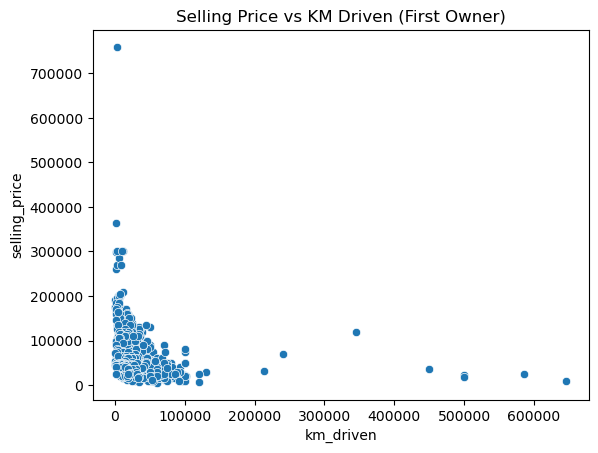

In [181]:
first_owner_df = df_copy[df_copy['owner'] == '1st owner']
sns.scatterplot(data=first_owner_df, x='km_driven', y='selling_price')
plt.title('Selling Price vs KM Driven (First Owner)')
plt.show()

In [182]:
Q1 = df_copy['km_driven'].quantile(0.25)
Q3 = df_copy['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_iqr_cleaned = df_copy[(df_copy['km_driven'] >= lower_bound) & (df_copy['km_driven'] <= upper_bound)]
print("Shape after removing outliers:", df_iqr_cleaned.shape)


Shape after removing outliers: (1017, 7)


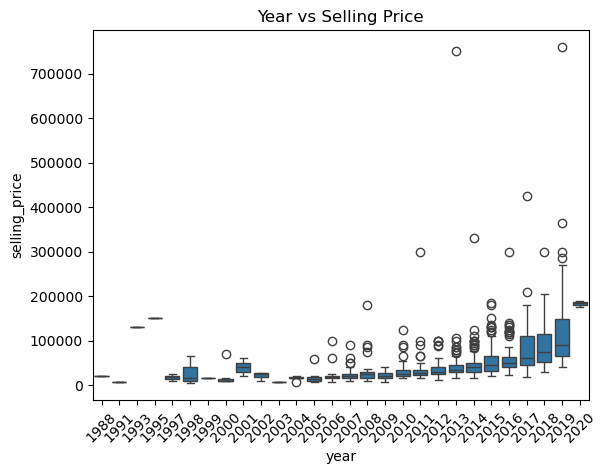

In [183]:
sns.boxplot(data = df_copy, x='year', y='selling_price')
plt.xticks(rotation=45)
plt.title("Year vs Selling Price")
plt.show()

In [184]:
from datetime import datetime

df_copy['age'] = datetime.now().year - df_copy['year']
depreciation = df_copy.groupby('age')['selling_price'].mean()
print(depreciation)

age
5     183333.333333
6     119689.511628
7      87603.915385
8      78962.121212
9      58469.018692
10     56500.000000
11     48668.131868
12     51152.777778
13     35976.637681
14     35655.721311
15     31993.220339
16     22240.740741
17     34289.285714
18     24927.586207
19     23380.000000
20     16978.571429
21     15100.000000
22      8000.000000
23     20666.666667
24     40000.000000
25     20833.333333
26     15000.000000
27     28333.333333
28     17500.000000
30    150000.000000
32    130000.000000
34      6000.000000
37     20000.000000
Name: selling_price, dtype: float64


In [185]:
yearly_avg = df_copy.groupby('year')['selling_price'].mean()
merged = df_copy.merge(yearly_avg, on='year', suffixes=('', '_year_avg'))
high_priced_bikes = merged[merged['selling_price'] > merged['selling_price_year_avg'] * 1.5]
print(high_priced_bikes[['name', 'year', 'selling_price', 'selling_price_year_avg']])

                                     name  year  selling_price  \
2     Royal Enfield Classic Gunmetal Grey  2018         150000   
7    Royal Enfield Bullet 350 [2007-2011]  2008         180000   
13                          Yamaha YZF R3  2019         365000   
18    Royal Enfield Classic Gunmetal Grey  2018         150000   
23                          Jawa Standard  2019         180000   
..                                    ...   ...            ...   
973             Royal Enfield Thunder 500  2015         105000   
975             Royal Enfield Thunder 350  2013         105000   
977             Royal Enfield Classic 350  2015         100000   
978             Royal Enfield Classic 500  2014          95000   
979             Royal Enfield Classic 500  2011          90000   

     selling_price_year_avg  
2              87603.915385  
7              34289.285714  
13            119689.511628  
18             87603.915385  
23            119689.511628  
..                      ...

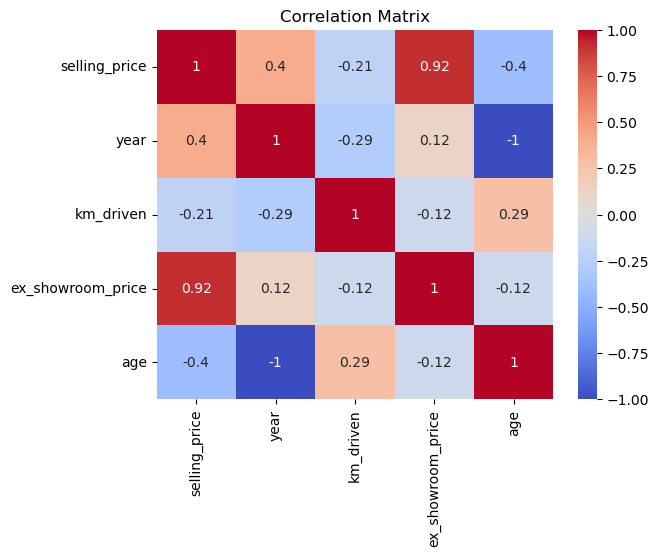

In [186]:
corr_matrix = df_copy.select_dtypes(include='number').corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()